In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Imports

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2

### Loading custom dataset

In [3]:
x_train = np.load('/content/gdrive/My Drive/customDataset/trainX.npy') / 255.0
y_train = np.load('/content/gdrive/My Drive/customDataset/trainY.npy')
x_test = np.load('/content/gdrive/My Drive/customDataset/testX.npy') / 255.0
y_test = np.load('/content/gdrive/My Drive/customDataset/testY.npy')

x_train, y_train = shuffle(x_train, y_train)

print('trainX: {} - trainY: {}'.format(x_train.shape, y_train.shape))
print('testX: {} - testY: {}'.format(x_test.shape, y_test.shape))

trainX: (58000, 40, 168, 1) - trainY: (58000, 1)
testX: (2000, 40, 168, 1) - testY: (2000, 1)


### Custom dataset preview

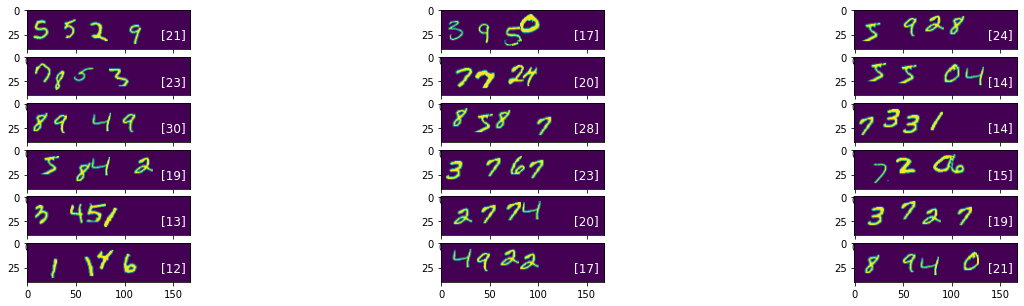

In [4]:
fig = plt.figure(figsize=(4.2 * 5, 1 * 5))
grid = fig.add_gridspec(6, 3)

for i in range(6):
    for j in range(3):
        ax = fig.add_subplot(grid[i, j])
        ax.annotate(f'{y_train[(i * 3) + j]}',(150, 25), ha='center', va='center', color='white', fontsize=12)
        plt.imshow(x_train[(i * 3) + j].reshape(40, 168))

### Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(40, 168, 1), filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 168, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 80, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 40, 48)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 36, 64)         76864     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 18, 64)        0

### Compiling with optimizer and loss

In [6]:
model.compile(optimizer='adam', loss='mse')

### Training

In [7]:
model.fit(x_train, y_train, epochs=130, validation_split=0.2)

Epoch 1/130
1450/1450 [==============================] - 21s 9ms/step - loss: 13.5075 - val_loss: 7.0645
Epoch 2/130
1450/1450 [==============================] - 13s 9ms/step - loss: 3.1156 - val_loss: 2.5005
Epoch 3/130
1450/1450 [==============================] - 14s 10ms/step - loss: 2.1524 - val_loss: 2.5239
Epoch 4/130
1450/1450 [==============================] - 12s 8ms/step - loss: 1.7016 - val_loss: 1.6524
Epoch 5/130
1450/1450 [==============================] - 12s 8ms/step - loss: 1.3775 - val_loss: 1.5005
Epoch 6/130
1450/1450 [==============================] - 12s 8ms/step - loss: 1.1711 - val_loss: 1.4412
Epoch 7/130
1450/1450 [==============================] - 13s 9ms/step - loss: 0.9579 - val_loss: 1.7373
Epoch 8/130
1450/1450 [==============================] - 13s 9ms/step - loss: 0.8285 - val_loss: 1.1678
Epoch 9/130
1450/1450 [==============================] - 14s 9ms/step - loss: 0.7334 - val_loss: 1.1890
Epoch 10/130
1450/1450 [==============================] - 12s 

### Model evaluation

In [8]:
print(f'Loss on test data: {model.evaluate(x_test, y_test)}')

63/63 [==============================] - 0s 4ms/step - loss: 1.3979
Loss on test data: 1.3979346752166748


In [9]:
prediction = model.predict(x_test)
prediction = tf.math.round(prediction)
plot_x = []
plot_y = []
count = 0
for y,p_y,i in zip(y_test, prediction, range(y_test.shape[0])):
    if(y == p_y):
      plot_x.append(x_test[i])
      plot_y.append(y_test[i])
      count += 1
        
print('count: {} || acc: {}'.format(count, count / y_test.shape[0]))

63/63 [==============================] - 0s 3ms/step
count: 787 || acc: 0.3935


### Prediction results samples

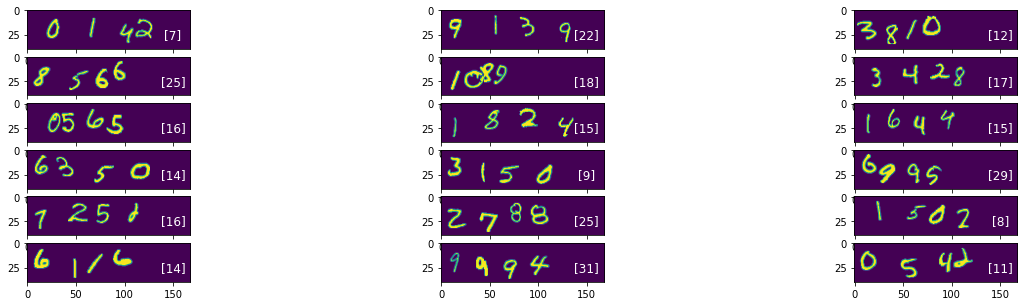

In [10]:
fig = plt.figure(figsize=(4.2 * 5, 1 * 5))
grid = fig.add_gridspec(6, 3)

for i in range(6):
    for j in range(3):
        ax = fig.add_subplot(grid[i, j])
        ax.annotate(f'{plot_y[(i * 3) + j]}',(150, 25), ha='center', va='center', color='white', fontsize=12)
        plt.imshow(plot_x[(i * 3) + j].reshape(40, 168))